In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [4]:
df.shape

(5847, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


### **a) Look for the missing values in all the columns and either impute them (replace with mean, median, or mode) or drop them. Justify your action for this task.**

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


### **Note: Since the dataframe is not cleaned yet and the units are still present in columns like Mileage, Engine, and Power (although they are of numeric type, they are considered as object type), I am first creating a copy of the dataframe. I will replace missing values with the mode on the copy. Later, after removing the units, I will handle the missing values again.**

### **Handling Mileage, Engine, Power**

**Reason: Mileage, Engine, Power is of Object type. So I'm using mode to impute the missing values**

In [7]:
df1 = df.copy()
for col in ['Mileage', 'Engine', 'Power']:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].fillna(df1[col].mode()[0])
    print(f'Null Values in {col}: {df1[col].isnull().sum()}')

Null Values in Mileage: 0
Null Values in Engine: 0
Null Values in Power: 0


### **Handling Seats**

**Let's check seats distribution**

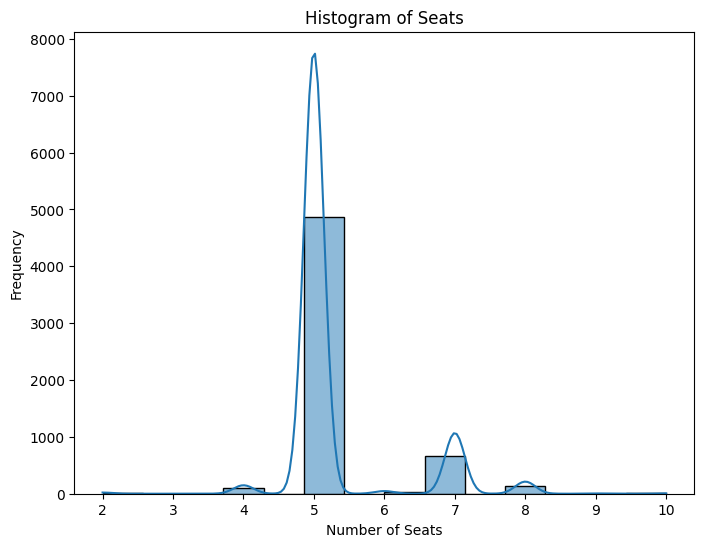

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['Seats'].dropna(), kde=True)
plt.title('Histogram of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()

In [9]:
df1['Seats'].value_counts()

,count
Seats,
5.0,4866
7.0,668
8.0,133
4.0,93
6.0,29
2.0,13
10.0,4
9.0,3


**Reason: Seats doesn't follow Normal distribution. Also most of the data is concentrated at 5 so I'll use mode to impute the null values**

In [10]:
mode_seats = df1['Seats'].mode()[0]
df1['Seats'] = df1['Seats'].fillna(mode_seats)
print(f'Null Values in Seats: {df1["Seats"].isnull().sum()}')

Null Values in Seats: 0


### **Handling New_Price**

In [11]:
print(f'Percentage of null values in New_Price: {df1["New_Price"].isna().mean() * 100:.2f}%')

Percentage of null values in New_Price: 86.06%


**Reason: Dropping 'New_Price' due to over 85% missing values.**

In [12]:
df1.drop('New_Price', axis=1, inplace=True)

In [13]:
df1.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50


### **b) Remove the units from some of the attributes and only keep the numerical values (for example remove kmpl from “Mileage”, CC from “Engine”, bhp from “Power”, and lakh from “New_price”).**

In [14]:
for col in ['Mileage', 'Engine', 'Power', 'New_Price']:
  df[col] = df[col].astype(str).str.extract(r'([-+]?\d*\.\d+|\d+)')

In [15]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13,1199,88.7,5.0,8.61,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN,3.50


### **After cleaning the data I'm handling the missing values in the original dataset again**

### **a) Look for the missing values in all the columns and either impute them (replace with mean, median, or mode) or drop them. Justify your action for this task.**

In [16]:
df.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


### **Handling Mileage**

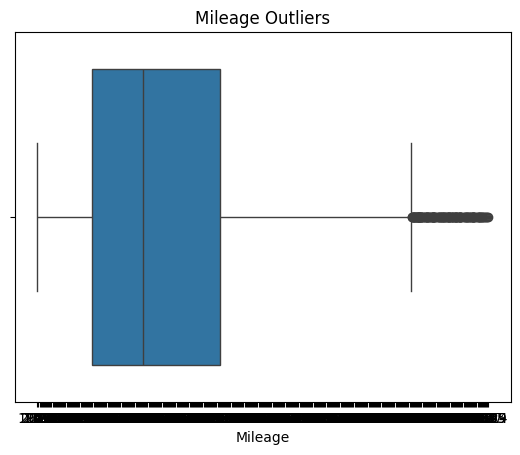

In [17]:
sns.boxplot(x=df['Mileage'])
plt.title("Mileage Outliers")
plt.show()

**The mileage data exhibits minimal deviation, with very few outliers observed.**

In [18]:
# for the presence of NaN values
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

In [19]:
mean_mileage = df['Mileage'].mean()
median_mileage = df['Mileage'].median()
print('Mean Mileage: ', mean_mileage)
print('Median Mileage: ', median_mileage)

Mean Mileage:  18.158496150556033
Median Mileage:  18.19


**Reason: For Mileage, mean and median are approximately equal and the distribution is not sensitive to outliers so we can choose either mean or median for imputation. I'm choosing mean for imputation**

In [20]:
df['Mileage'].fillna(mean_mileage, inplace=True)
print(f'Null Values in Mileage: {df["Mileage"].isnull().sum()}')

Null Values in Mileage: 0


<ipython-input-20-01b3613038bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage'].fillna(mean_mileage, inplace=True)


### **Handling Engine**

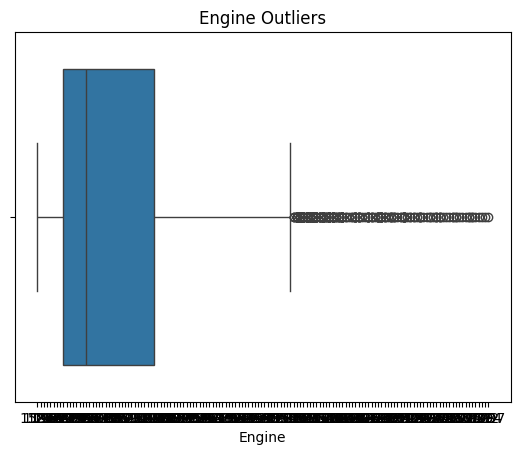

In [21]:
sns.boxplot(x=df['Engine'])
plt.title("Engine Outliers")
plt.show()

**Right Skewed and Presence of outliers can be seen**

In [22]:
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

In [23]:
mean_engine = df['Engine'].mean()
median_engine = df['Engine'].median()
print('Mean Engine: ', mean_engine)
print('Median Engine: ', median_engine)

Mean Engine:  1631.552572706935
Median Engine:  1497.0


**Reason: For Engine, mean > median, which hints at right skewness also confirms that mean is sensitive to the outliers so I'll use median for imputation**

In [24]:
df['Engine'].fillna(median_engine, inplace=True)
print(f'Null Values in Engine: {df["Engine"].isnull().sum()}')

Null Values in Engine: 0


<ipython-input-24-efdbb82b2125>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine'].fillna(median_engine, inplace=True)


### **Handling Power**

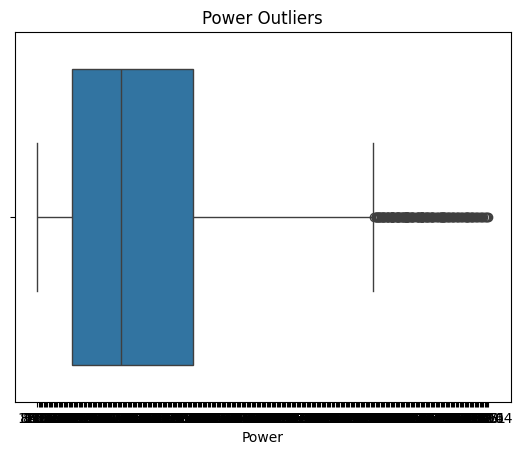

In [25]:
sns.boxplot(x=df['Power'])
plt.title("Power Outliers")
plt.show()

**Right Skewed and Presence of outliers can be seen**

In [26]:
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [27]:
mean_power = df['Power'].mean()
median_power = df['Power'].median()
print('Mean Power: ', mean_power)
print('Median Power: ', median_power)

Mean Power:  113.80314403717087
Median Power:  98.6


**Reason: For Power, mean > median which hints at right skewness also confirms that mean is sensitive to the outliers so I'll use median for imputation**

In [28]:
df['Power'].fillna(median_power, inplace=True)
print(f'Null Values in Power: {df["Power"].isnull().sum()}')

Null Values in Power: 0


<ipython-input-28-fb224b59232c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Power'].fillna(median_power, inplace=True)


### **Handling Seats**

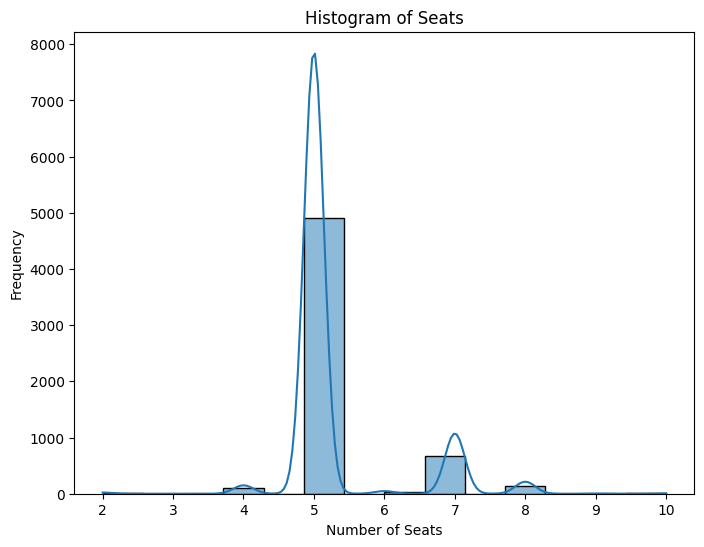

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['Seats'].dropna(), kde=True)
plt.title('Histogram of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()

**Reason: Seats Column doesn't follow normal distribution as already observed and also most of the data is concentrated at 5 so I'll use mode to impute the null values**

In [30]:
mode_seats = df['Seats'].mode()[0]
df['Seats'] = df['Seats'].fillna(mode_seats)
print(f'Null Values in Seats: {df["Seats"].isnull().sum()}')

Null Values in Seats: 0


### **Handling New_Price**

In [31]:
print(f'Percentage of null values in New_Price: {df["New_Price"].isna().mean() * 100:.2f}%')

Percentage of null values in New_Price: 86.06%


**Reason: Dropping 'New_Price' due to over 85% missing values.**

In [32]:
df.drop('New_Price', axis=1, inplace=True)

In [33]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


###**c) Change the categorical variables (“Fuel_Type” and “Transmission”) into numerical one hot encoded value.**

In [34]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission'])

# Verify the encoding
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,True,False,False,False,True
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,False,False,True,False,True
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,True,False,False,False,True
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,True,False,False,True,False
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,True,False,False,False,True


### **d) Create one more feature and add this column to the dataset (you can use mutate function in R for this). For example, you can calculate the current age of the car by subtracting “Year” valuefrom the current year.**

In [35]:
# Calculate car age
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

print(df[['Year', 'Car_Age']].head())

   Year  Car_Age
0  2015       10
1  2011       14
2  2012       13
3  2013       12
4  2013       12


### **e) Perform select, filter, rename, mutate, arrange and summarize with group by operations (or their equivalent operations in python) on this dataset.**

### **Select**

In [36]:
# 1. Select specific columns
selected = df[['Name', 'Year', 'Price']]
selected.head()

,Name,Year,Price
0,Hyundai Creta 1.6 CRDi SX Option,2015,12.50
1,Honda Jazz V,2011,4.50
2,Maruti Ertiga VDI,2012,6.00
3,Audi A4 New 2.0 TDI Multitronic,2013,17.74
4,Nissan Micra Diesel XV,2013,3.50


### **Filter**

In [37]:
# 2. Filter data (cars newer than 2015)
filtered = df[df['Year'] > 2015]
filtered.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Car_Age
5,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,First,11.36,2755.0,171.50,8.0,17.50,True,False,False,True,False,9
8,10,Maruti Ciaz Zeta,Kochi,2018,25692,First,21.56,1462.0,103.25,5.0,9.95,False,False,True,False,True,7
14,16,Honda Amaze S i-Dtech,Kochi,2016,58950,First,25.80,1498.0,98.60,5.0,5.40,True,False,False,False,True,9
15,17,Maruti Swift DDiS VDI,Jaipur,2017,25000,First,28.40,1248.0,74.00,5.0,5.99,True,False,False,False,True,8
26,28,Honda WRV i-VTEC VX,Kochi,2018,37430,First,17.50,1199.0,88.70,5.0,9.90,False,False,True,False,True,7


In [38]:
print('Total Cars newer than 2015: ', len(filtered))

Total Cars newer than 2015:  1711


### **Rename**

In [39]:
# 3. Rename columns
renamed = df.rename(columns={'Name': 'Brand_Model', 'Year': 'Purchase_Year'})
renamed.head()

,Unnamed: 0,Brand_Model,Location,Purchase_Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Car_Age
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,True,False,False,False,True,10
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,False,False,True,False,True,14
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,True,False,False,False,True,13
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,True,False,False,True,False,12
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,True,False,False,False,True,12


### **Mutate**

In [40]:
# 4. Mutate (create new column - price per year)
current_year = 2025
df['Car_Age_2'] = current_year - df['Year']

print(df[['Year', 'Car_Age_2']].head())

   Year  Car_Age_2
0  2015         10
1  2011         14
2  2012         13
3  2013         12
4  2013         12


### **Arrange**

In [41]:
# 5. Arrange/Sort by price (descending)
arranged = df.sort_values('Price', ascending=False)
arranged.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Car_Age,Car_Age_2
3952,4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,First,13.33,2993.0,255.0,5.0,160.00,True,False,False,True,False,8,8
5620,5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Third,6.40,5204.0,560.0,2.0,120.00,False,False,True,True,False,14,14
5752,5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,First,12.50,5000.0,488.1,2.0,100.00,False,False,True,True,False,10,10
1457,1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,First,12.65,2993.0,255.0,5.0,97.07,True,False,False,True,False,6,6
1917,1974,BMW 7 Series 740Li,Coimbatore,2018,28060,First,12.05,2979.0,320.0,5.0,93.67,False,False,True,True,False,7,7


### **Summarize with groupby**

In [42]:
# 6. Summarize with groupby
summary = df.groupby('Fuel_Type_Petrol')['Price'].describe()
print(summary)

                   count       mean        std   min   25%    50%    75%  \
Fuel_Type_Petrol                                                           
False             3163.0  12.960632  12.850083  0.60  4.90  7.850  16.54   
True              2684.0   5.756688   7.372436  0.44  2.78  4.205   6.20   

                    max  
Fuel_Type_Petrol         
False             160.0  
True              120.0  
